## ProjF5 - Final Model

Team 160 | Michael Dacanay, Soundarya Khanapur, Ophelia Sin

In [9]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas as pd
from sklearn.preprocessing import StandardScaler

### 1. Load and Prepare Data

This should illustrate your code for loading the dataset and the split into training, validation and testing. You can add steps like pre-processing if needed.

In [1]:
# Load the dataset
file_path = 'datasets/train_dataset.csv'  
data = pd.read_csv(file_path)

In [2]:
data.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,35,170,85,97.0,0.9,0.9,1,1,118,78,...,70,142,19.8,1,1.0,61,115,125,1,1
1,20,175,110,110.0,0.7,0.9,1,1,119,79,...,71,114,15.9,1,1.1,19,25,30,1,0
2,45,155,65,86.0,0.9,0.9,1,1,110,80,...,57,112,13.7,3,0.6,1090,1400,276,0,0
3,45,165,80,94.0,0.8,0.7,1,1,158,88,...,46,91,16.9,1,0.9,32,36,36,0,0
4,20,165,60,81.0,1.5,0.1,1,1,109,64,...,47,92,14.9,1,1.2,26,28,15,0,0


In [4]:
#ensure no noull values exist
data.isnull().sum()

age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

In [5]:
data.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,...,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000
mean,44.127591,164.689488,65.938718,82.062115,1.014955,1.008768,1.025369,1.026190,121.475631,75.994408,...,57.293146,115.081495,14.624264,1.086523,0.886030,26.198235,27.145188,39.905038,0.214421,0.367279
std,12.063564,9.187507,12.896581,9.326798,0.498527,0.493813,0.157246,0.159703,13.643521,9.658734,...,14.617822,42.883163,1.566528,0.402107,0.220621,19.175595,31.309945,49.693843,0.410426,0.482070
min,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,40.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,70.000000,...,47.000000,91.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,26.000000,0.000000,0.000000
75%,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,...,66.000000,136.000000,15.800000,1.000000,1.000000,29.000000,31.000000,44.000000,0.000000,1.000000
max,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,233.000000,146.000000,...,359.000000,1860.000000,21.100000,6.000000,11.600000,1090.000000,2914.000000,999.000000,1.000000,1.000000


In [6]:
#standardize all column names

data.columns = data.columns.str.lower() #convert all columns to lowercase

#strip all symbols and replace with space, strip all tailing whitespaces and remaining white spaces replaced with underscores 
data.columns = data.columns.str.replace(r'[^a-zA-Z0-9]', ' ', regex=True).str.strip()
data.columns = data.columns.str.replace(' ', '_', regex=True)

In [10]:
# create two new features based on existing columns

data['bmi'] = data['weight_kg'] / (data['height_cm']**2)
data['glucose_category'] = pd.cut(data['fasting_blood_sugar'], bins=[0, 99, 125, np.inf], labels=['normal', 'prediabetes', 'diabetes'])


In [11]:
# separate X and y 

X, y = data.drop(['smoking'],axis=1),data['smoking']

In [12]:
# set up preprocess function to convert certain variables to dummies 

def preprocess(df):
    df = pd.get_dummies(df,columns = ["hearing_left", "hearing_right","urine_protein","dental_caries", "glucose_category"],dtype = 'int8')
    return df

In [13]:
X = preprocess(X)

In [24]:
# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  

# Ensure y is also a numpy array
y = y.values

### 2. Prepare your Final Model

#### a. Grid Search
First, we use grid search to identify the hyperparameters that will be most optimal for a simple Sequential model with 3 layers. <br>
- We found that the best model had a 73.14% accuracy using {'batch_size': 32, 'epochs': 50, 'model__l2_rate': 0.01, 'model__neurons': 64}.

In [18]:
from sklearn.model_selection import  StratifiedKFold, GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier 
from tensorflow.keras.regularizers import l2

In [ ]:
def create_model(neurons=128, l2_rate=0.01):
    model = Sequential([
        Dense(neurons, activation='relu', input_dim=X.shape[1], kernel_regularizer=l2(l2_rate)),
        Dense(neurons, activation='relu', kernel_regularizer=l2(l2_rate)),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0)

# grid search parameters
param_grid = {
    'model__neurons': [64, 128],
    'model__l2_rate': [0.001, 0.01, 0.02],
    'batch_size': [32, 64],
    'epochs': [20, 50]
}

# Setup cross-validation and grid search
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=kfold)

# Perform grid search with cross-validation
grid_result = grid.fit(X, y)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Then, we applied grid search on a more complex model to see if adding more layers is beneficial. We found that the best hyperparameters yielded 72.70% accuracy using {'batch_size': 64, 'epochs': 20, 'model__dropout_rate': 0.2, 'model__l2_rate': 0.001}.


In [19]:
from tensorflow.keras.models import Sequential
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation, Input
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

In [25]:
def create_optimized_model(l2_rate, dropout_rate ):
    model = Sequential([
        Input(shape = (X_scaled.shape[1],)),
        Dense(512, kernel_regularizer=l2(l2_rate)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(dropout_rate),

        Dense(256, kernel_regularizer=l2(l2_rate)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(dropout_rate),

        Dense(128, kernel_regularizer=l2(l2_rate)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(dropout_rate),

        Dense(64, kernel_regularizer=l2(l2_rate)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(dropout_rate),

        Dense(32, kernel_regularizer=l2(l2_rate)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(dropout_rate),

        Dense(1, activation='sigmoid')
    ])
    
    optimizer = Adam(learning_rate=0.01)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_optimized_model, verbose=0)

# grid search parameters
param_grid = {
    'model__l2_rate': [0.001, 0.01, 0.02],
    'batch_size': [32, 64],
    'epochs': [10, 20],
    'model__dropout_rate': [0.2, 0.3, 0.5],
}

# Setup cross-validation and grid search
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=kfold)

# Perform grid search with cross-validation
grid_result = grid.fit(X_scaled, y)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/Users/opheliasin/smokerstatusNNDL/myenv/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/opheliasin/smokerstatusNNDL/myenv/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/opheliasin/smokerstatusNNDL/myenv/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/opheliasin/smokerstatusNNDL/myenv/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``

Best: 0.727042 using {'batch_size': 64, 'epochs': 20, 'model__dropout_rate': 0.2, 'model__l2_rate': 0.001}
0.703802 (0.034044) with: {'batch_size': 32, 'epochs': 10, 'model__dropout_rate': 0.2, 'model__l2_rate': 0.001}
0.668812 (0.035764) with: {'batch_size': 32, 'epochs': 10, 'model__dropout_rate': 0.2, 'model__l2_rate': 0.01}
0.661963 (0.036189) with: {'batch_size': 32, 'epochs': 10, 'model__dropout_rate': 0.2, 'model__l2_rate': 0.02}
0.715140 (0.010084) with: {'batch_size': 32, 'epochs': 10, 'model__dropout_rate': 0.3, 'model__l2_rate': 0.001}
0.648753 (0.026487) with: {'batch_size': 32, 'epochs': 10, 'model__dropout_rate': 0.3, 'model__l2_rate': 0.01}
0.662810 (0.027689) with: {'batch_size': 32, 'epochs': 10, 'model__dropout_rate': 0.3, 'model__l2_rate': 0.02}
0.700698 (0.009102) with: {'batch_size': 32, 'epochs': 10, 'model__dropout_rate': 0.5, 'model__l2_rate': 0.001}
0.682640 (0.023786) with: {'batch_size': 32, 'epochs': 10, 'model__dropout_rate': 0.5, 'model__l2_rate': 0.01}
0.

#### b. Acitvation functions 
We also tested the model with other activation functions such as Stochastic Gradient Descent and RMSprop, to see if the results would improve. We also added **early stopping** to prevent overfitting.

##### i. Stochastic Gradient Descent

The simple model gave us 
- Average accuracy:  0.7321
- Average balanced accuracy:  0.7047

Whereas the complex model gave us 
- Average accuracy:  0.7491
- Average balanced accuracy:  0.7287

In [27]:
# Simple model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.metrics import Accuracy
from sklearn.metrics import balanced_accuracy_score


from sklearn.utils import class_weight
import numpy as np

# Define the K-fold cross validator
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def create_model(neurons=64, l2_rate=0.01):
    model = Sequential([
        Dense(neurons, activation='relu', input_dim=X.shape[1], kernel_regularizer=l2(l2_rate)),
        Dense(neurons, activation='relu', kernel_regularizer=l2(l2_rate)),
        Dense(1, activation='sigmoid')
    ])
    optimizer = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model



# Assuming you have a setup for training and validation splits
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min'),
    ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=0)
]

accuracies = [] 
balanced_accuracies = []

# K-fold Cross Validation model evaluation
for train, test in kfold.split(X_scaled, y):
    model = create_model()
    # Fit data to model
    history = model.fit(X_scaled[train], y[train], epochs=50, batch_size=32, callbacks=callbacks, verbose=0, validation_split=0.2, 
                        validation_data=(X_scaled[test], y[test]))
    # Evaluate the model
    _, accuracy = model.evaluate(X_scaled[test], y[test], verbose=0)
    accuracies.append(accuracy)

    y_pred = model.predict(X_scaled[test]) 
    y_pred_labels = (y_pred > 0.5).astype(int)
    balanced_accuracy = balanced_accuracy_score(y[test], y_pred_labels)

    balanced_accuracies.append(balanced_accuracy)

    print("Balanced Accuracy:", balanced_accuracy)

print("Average accuracy: ", np.mean(accuracies))
print("Average balanced accuracy: ", np.mean(balanced_accuracies))

/Users/opheliasin/smokerstatusNNDL/myenv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 25: early stopping
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
Balanced Accuracy: 0.7184402983215308


/Users/opheliasin/smokerstatusNNDL/myenv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 10: early stopping
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
Balanced Accuracy: 0.7282362639820523


/Users/opheliasin/smokerstatusNNDL/myenv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 10: early stopping
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
Balanced Accuracy: 0.6965592784088914


/Users/opheliasin/smokerstatusNNDL/myenv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 10: early stopping
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step
Balanced Accuracy: 0.7235671180929519


/Users/opheliasin/smokerstatusNNDL/myenv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 10: early stopping
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
Balanced Accuracy: 0.6566552048940256
Average accuracy:  0.7321462154388427
Average balanced accuracy:  0.7046916327398904


In [28]:
# Complex model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import balanced_accuracy_score


from sklearn.utils import class_weight
import numpy as np

# Define the K-fold cross validator
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def create_optimized_model(l2_rate = 0.001, dropout_rate= 0.2):
    model = Sequential([
        Input(shape = (X_scaled.shape[1],)),
        Dense(512, kernel_regularizer=l2(l2_rate)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(dropout_rate),

        Dense(256, kernel_regularizer=l2(l2_rate)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(dropout_rate),

        Dense(128, kernel_regularizer=l2(l2_rate)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(dropout_rate),

        Dense(64, kernel_regularizer=l2(l2_rate)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(dropout_rate),

        Dense(32, kernel_regularizer=l2(l2_rate)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(dropout_rate),

        Dense(1, activation='sigmoid')
    ])
    
    optimizer = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model



# Assuming you have a setup for training and validation splits
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min'),
    ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=0)
]

accuracies = [] 
balanced_accuracies = []

# K-fold Cross Validation model evaluation
for train, test in kfold.split(X_scaled, y):
    model = create_optimized_model()
    # Fit data to model
    history = model.fit(X_scaled[train], y[train], epochs=20, batch_size=64, callbacks=callbacks, verbose=0, validation_split=0.2, 
                        validation_data=(X_scaled[test], y[test]))
    # Evaluate the model
    _, accuracy = model.evaluate(X_scaled[test], y[test], verbose=0)
    accuracies.append(accuracy)

    y_pred = model.predict(X_scaled[test]) 
    y_pred_labels = (y_pred > 0.5).astype(int)
    balanced_accuracy = balanced_accuracy_score(y[test], y_pred_labels)

    balanced_accuracies.append(balanced_accuracy)
    print("Balanced Accuracy:", balanced_accuracy)

print("Complex model results with SGD")
print("------------------------------")
print("Average accuracy: ", np.mean(accuracies))
print("Average balanced accuracy: ", np.mean(balanced_accuracies))

244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Balanced Accuracy: 0.7100741769317798
Epoch 10: early stopping
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Balanced Accuracy: 0.7337254970798646
Epoch 10: early stopping
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Balanced Accuracy: 0.7365076097924479
Epoch 10: early stopping
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Balanced Accuracy: 0.7186369331196948
Epoch 10: early stopping
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Balanced Accuracy: 0.744424891874556
Complex model results with SGD
------------------------------
Average accuracy:  0.749051034450531
Average balanced accuracy:  0.7286738217596687


##### ii. RMSProp 
Here we chose to use a learning rate of 0.001 for testing.

The simple model yields:
- Average accuracy:  0.7481
- Average balanced accuracy:  0.7255

And the complex model yielded:
- Average accuracy:  0.7444
- Average balanced accuracy:  0.7253

In [30]:
# Simple model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import balanced_accuracy_score


from sklearn.utils import class_weight
import numpy as np

# Define the K-fold cross validator
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def create_model(neurons=64, l2_rate=0.01):
    model = Sequential([
        Dense(neurons, activation='relu', input_dim=X.shape[1], kernel_regularizer=l2(l2_rate)),
        Dense(neurons, activation='relu', kernel_regularizer=l2(l2_rate)),
        Dense(1, activation='sigmoid')
    ])
    optimizer = RMSprop(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model


callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min'),
    ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=0)
]

accuracies = [] 
balanced_accuracies = []

# K-fold Cross Validation model evaluation
for train, test in kfold.split(X_scaled, y):
    model = create_model()
    # Fit data to model
    history = model.fit(X_scaled[train], y[train], epochs=50, batch_size=32, callbacks=callbacks, verbose=0, validation_split=0.2, 
                        validation_data=(X_scaled[test], y[test]))
    # Evaluate the model
    _, accuracy = model.evaluate(X_scaled[test], y[test], verbose=0)
    accuracies.append(accuracy)

    y_pred = model.predict(X_scaled[test]) 
    y_pred_labels = (y_pred > 0.5).astype(int)
    balanced_accuracy = balanced_accuracy_score(y[test], y_pred_labels)

    balanced_accuracies.append(balanced_accuracy)

    print("Balanced Accuracy:", balanced_accuracy)

print("Simple model results with RMSProp")
print("------------------------------")
print("Average accuracy: ", np.mean(accuracies))
print("Average balanced accuracy: ", np.mean(balanced_accuracies))

/Users/opheliasin/smokerstatusNNDL/myenv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 32: early stopping
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step
Balanced Accuracy: 0.7373228284147237


/Users/opheliasin/smokerstatusNNDL/myenv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 10: early stopping
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step
Balanced Accuracy: 0.7132804439828904


/Users/opheliasin/smokerstatusNNDL/myenv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 10: early stopping
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step
Balanced Accuracy: 0.7223485346095784


/Users/opheliasin/smokerstatusNNDL/myenv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 10: early stopping
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step
Balanced Accuracy: 0.7213491932134989


/Users/opheliasin/smokerstatusNNDL/myenv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 10: early stopping
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
Balanced Accuracy: 0.7330112080290139
Simple model results with RMSProp
------------------------------
Average accuracy:  0.7481019020080566
Average balanced accuracy:  0.7254624416499411


In [31]:
# Complex model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import balanced_accuracy_score

# Define the K-fold cross validator
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def create_optimized_model(l2_rate = 0.001, dropout_rate= 0.2):
    model = Sequential([
        Input(shape = (X_scaled.shape[1],)),
        Dense(512, kernel_regularizer=l2(l2_rate)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(dropout_rate),

        Dense(256, kernel_regularizer=l2(l2_rate)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(dropout_rate),

        Dense(128, kernel_regularizer=l2(l2_rate)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(dropout_rate),

        Dense(64, kernel_regularizer=l2(l2_rate)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(dropout_rate),

        Dense(32, kernel_regularizer=l2(l2_rate)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(dropout_rate),

        Dense(1, activation='sigmoid')
    ])
    
    optimizer = RMSprop(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model



# Assuming you have a setup for training and validation splits
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min'),
    ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=0)
]

accuracies = [] 
balanced_accuracies = []

# K-fold Cross Validation model evaluation
for train, test in kfold.split(X_scaled, y):
    model = create_optimized_model()
    # Fit data to model
    history = model.fit(X_scaled[train], y[train], epochs=20, batch_size=64, callbacks=callbacks, verbose=0, validation_split=0.2, 
                        validation_data=(X_scaled[test], y[test]))
    # Evaluate the model
    _, accuracy = model.evaluate(X_scaled[test], y[test], verbose=0)
    accuracies.append(accuracy)

    y_pred = model.predict(X_scaled[test]) 
    y_pred_labels = (y_pred > 0.5).astype(int)
    balanced_accuracy = balanced_accuracy_score(y[test], y_pred_labels)

    balanced_accuracies.append(balanced_accuracy)
    print("Balanced Accuracy:", balanced_accuracy)

print("Complex model results with RMSProp")
print("------------------------------")
print("Average accuracy: ", np.mean(accuracies))
print("Average balanced accuracy: ", np.mean(balanced_accuracies))

244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Balanced Accuracy: 0.7302717801217884
Epoch 10: early stopping
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Balanced Accuracy: 0.7237733180484412
Epoch 10: early stopping
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Balanced Accuracy: 0.7231214970549498
Epoch 10: early stopping
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Balanced Accuracy: 0.715346591777088
Epoch 10: early stopping
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Balanced Accuracy: 0.733826428171731
Complex model results with RMSProp
------------------------------
Average accuracy:  0.7444080829620361
Average balanced accuracy:  0.7252679230347996


In terms of accuracy, using **SGD with the complex model** gave us the best accuracy at 74.91%. 

Here's an overview of the accuracies of the experiemnts we've run so far.
| Optimizer | Layers | Accuracy (%) | 
| ---- | -------| ----------|
| ADAM | Simple | 73.14 |
| ADAM | Complex | 72.70 |
| SGD | Simple | 73.21 |
| **SGD** | **Complex** | **74.91** |
| RMSprop | Simple | 74.81 |
| RMSprop | Complex | 74.44 |

#### c. Class Weights and SMOTE
To better address the class imbalance, we experimented with class weights and `SMOTE`. 

##### i. Class weights

| Optimizer | Layers | Accuracy (%) | Balanced Accuracy (%) | 
| ---- | -------| ----------| --------------------- |
| ADAM | Simple | 70.72 | 73.81 |
| ADAM | Complex | 69.78 | 73.98| 
| SGD | Simple | 71.08 | 74.57 | 
| SGD | Complex | 71.75 | **75.34** | 
| RMSprop | Simple | **72.50** | 75.16 | 
| RMSprop | Complex |  71.49 | 74.65 | 

In [43]:
# class weights, complex model, sample code
from sklearn.utils import class_weight

# Define the K-fold cross validator
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def create_optimized_model(l2_rate = 0.001, dropout_rate= 0.2):
    model = Sequential([
        Input(shape = (X_scaled.shape[1],)),
        Dense(512, kernel_regularizer=l2(l2_rate)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(dropout_rate),

        Dense(256, kernel_regularizer=l2(l2_rate)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(dropout_rate),

        Dense(128, kernel_regularizer=l2(l2_rate)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(dropout_rate),

        Dense(64, kernel_regularizer=l2(l2_rate)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(dropout_rate),

        Dense(32, kernel_regularizer=l2(l2_rate)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(dropout_rate),

        Dense(1, activation='sigmoid')
    ])
    
    optimizer = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model


# Assuming you have a setup for training and validation splits
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min'),
    ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=0)
]
# List to store each fold's accuracy
accuracies = []
balanced_accuracies = []
fold_no = 1
 
# K-fold Cross Validation model evaluation
for train, test in kfold.split(X_scaled, y):

    class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y[train]), y=y[train])

    class_weights_dict = dict(enumerate(class_weights))

    model = create_optimized_model()
    # Fit data to model
    history = model.fit(X_scaled[train], y[train], epochs=20, batch_size=64, 
                        callbacks=callbacks, verbose=0, validation_split=0.2, 
                        validation_data=(X_scaled[test], y[test]),
                        class_weight=class_weights_dict)
    
    # Evaluate the model
    _, accuracy = model.evaluate(X_scaled[test], y[test], verbose=0)
    accuracies.append(accuracy)

    fold_no += 1

    y_pred = model.predict(X_scaled[test]) 
    y_pred_labels = (y_pred > 0.5).astype(int)
    balanced_accuracy = balanced_accuracy_score(y[test], y_pred_labels)
    balanced_accuracies.append(balanced_accuracy)
    print("Balanced Accuracy:", balanced_accuracy)


print("Complex model results with RMSprop and class weights")
print("------------------------------")
print("Average accuracy: ", np.mean(accuracies))
print("Average balanced accuracy: ", np.mean(balanced_accuracies))

244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Balanced Accuracy: 0.7556027656066147
Epoch 10: early stopping
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Balanced Accuracy: 0.7518294376488521
Epoch 10: early stopping
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Balanced Accuracy: 0.7528033469723343
Epoch 10: early stopping
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Balanced Accuracy: 0.7561743055839704
Epoch 10: early stopping
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Balanced Accuracy: 0.7507869156087309
Complex model results with RMSprop and class weights
------------------------------
Average accuracy:  0.7175250053405762
Average balanced accuracy:  0.7534393542841004


In [46]:
# Simple model
# Define the K-fold cross validator
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def create_model(neurons=64, l2_rate=0.01):
    model = Sequential([
        Dense(neurons, activation='relu', input_dim=X.shape[1], kernel_regularizer=l2(l2_rate)),
        Dense(neurons, activation='relu', kernel_regularizer=l2(l2_rate)),
        Dense(1, activation='sigmoid')
    ])
    optimizer =  SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model


callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min'),
    ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=0)
]

accuracies = [] 
balanced_accuracies = []

# K-fold Cross Validation model evaluation
for train, test in kfold.split(X_scaled, y):
    model = create_model()

    class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y[train]), y=y[train])

    class_weights_dict = dict(enumerate(class_weights))

    # Fit data to model
    history = model.fit(X_scaled[train], y[train], epochs=50, batch_size=32, callbacks=callbacks, verbose=0, validation_split=0.2, 
                        validation_data=(X_scaled[test], y[test]), class_weight = class_weights_dict)
    # Evaluate the model
    _, accuracy = model.evaluate(X_scaled[test], y[test], verbose=0)
    accuracies.append(accuracy)

    y_pred = model.predict(X_scaled[test]) 
    y_pred_labels = (y_pred > 0.5).astype(int)
    balanced_accuracy = balanced_accuracy_score(y[test], y_pred_labels)

    balanced_accuracies.append(balanced_accuracy)

    print("Balanced Accuracy:", balanced_accuracy)

print("Simple model results with SGD")
print("------------------------------")
print("Average accuracy: ", np.mean(accuracies))
print("Average balanced accuracy: ", np.mean(balanced_accuracies))

/Users/opheliasin/smokerstatusNNDL/myenv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 13: early stopping
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step
Balanced Accuracy: 0.7507675830995677


/Users/opheliasin/smokerstatusNNDL/myenv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 10: early stopping
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step
Balanced Accuracy: 0.7412939535020674


/Users/opheliasin/smokerstatusNNDL/myenv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 10: early stopping
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step
Balanced Accuracy: 0.7420539630489906


/Users/opheliasin/smokerstatusNNDL/myenv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 10: early stopping
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step
Balanced Accuracy: 0.7468961581736767


/Users/opheliasin/smokerstatusNNDL/myenv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 10: early stopping
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
Balanced Accuracy: 0.7473506141924562
Simple model results with SGD
------------------------------
Average accuracy:  0.7107532501220704
Average balanced accuracy:  0.7456724544033518


##### ii. SMOTE
| Optimizer | Layers | Accuracy (%) | Balanced Accuracy (%) | 
| ---- | -------| ----------| --------------------- |
| ADAM | Simple | 68.91 | 73.89 |
| ADAM | Complex | 71.23 | 74.58 |
| SGD | Simple |69.00| 73.83 | 
| SGD | Complex | **73.04** | **75.53** | 
| RMSprop | Simple | 69.60 | 74.30 |
| RMSprop | Complex | 71.60 | 75.03| 

In [47]:
from imblearn.over_sampling import SMOTE

In [50]:
# SMOTE, complex model, sample code
from sklearn.utils import class_weight

# Define the K-fold cross validator
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def create_optimized_model(l2_rate = 0.001, dropout_rate= 0.2):
    model = Sequential([
        Input(shape = (X_scaled.shape[1],)),
        Dense(512, kernel_regularizer=l2(l2_rate)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(dropout_rate),

        Dense(256, kernel_regularizer=l2(l2_rate)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(dropout_rate),

        Dense(128, kernel_regularizer=l2(l2_rate)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(dropout_rate),

        Dense(64, kernel_regularizer=l2(l2_rate)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(dropout_rate),

        Dense(32, kernel_regularizer=l2(l2_rate)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(dropout_rate),

        Dense(1, activation='sigmoid')
    ])
    
    optimizer = Adam(learning_rate=0.01)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model


# Assuming you have a setup for training and validation splits
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min'),
    ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=0)
]
# List to store each fold's accuracy
accuracies = []
balanced_accuracies = []
fold_no = 1
 
for train, test in kfold.split(X_scaled, y):

    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_scaled[train], y[train])

    model = create_optimized_model()
    # Fit data to model
    history = model.fit(X_train_smote, y_train_smote, epochs=20, batch_size=64, 
                        callbacks=callbacks, verbose=0, validation_split=0.2, 
                        validation_data=(X_scaled[test], y[test])
                        )
    
    # Evaluate the model
    _, accuracy = model.evaluate(X_scaled[test], y[test], verbose=0)
    accuracies.append(accuracy)

    fold_no += 1

    y_pred = model.predict(X_scaled[test]) 
    y_pred_labels = (y_pred > 0.5).astype(int)
    balanced_accuracy = balanced_accuracy_score(y[test], y_pred_labels)
    balanced_accuracies.append(balanced_accuracy)
    print("Balanced Accuracy:", balanced_accuracy)


print("Complex model results with RMSprop")
print("------------------------------")
print("Average accuracy: ", np.mean(accuracies))
print("Average balanced accuracy: ", np.mean(balanced_accuracies))

244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Balanced Accuracy: 0.7535983222669809
Epoch 10: early stopping
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Balanced Accuracy: 0.7446514792634713
Epoch 10: early stopping
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Balanced Accuracy: 0.7400711786543028
Epoch 10: early stopping
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Balanced Accuracy: 0.7428839231824456
Epoch 10: early stopping
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Balanced Accuracy: 0.7479631179354167
Complex model results with RMSprop
------------------------------
Average accuracy:  0.712292206287384
Average balanced accuracy:  0.7458336042605234


In [53]:
# Simple model
# Define the K-fold cross validator
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def create_model(neurons=64, l2_rate=0.01):
    model = Sequential([
        Dense(neurons, activation='relu', input_dim=X.shape[1], kernel_regularizer=l2(l2_rate)),
        Dense(neurons, activation='relu', kernel_regularizer=l2(l2_rate)),
        Dense(1, activation='sigmoid')
    ])
    optimizer = RMSprop(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model


callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min'),
    ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=0)
]

accuracies = [] 
balanced_accuracies = []

# K-fold Cross Validation model evaluation
for train, test in kfold.split(X_scaled, y):
    model = create_model()

    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_scaled[train], y[train])


    # Fit data to model
    history = model.fit(X_train_smote, y_train_smote, epochs=50, batch_size=32, callbacks=callbacks, verbose=0, validation_split=0.2, 
                        validation_data=(X_scaled[test], y[test]), class_weight = class_weights_dict)
    # Evaluate the model
    _, accuracy = model.evaluate(X_scaled[test], y[test], verbose=0)
    accuracies.append(accuracy)

    y_pred = model.predict(X_scaled[test]) 
    y_pred_labels = (y_pred > 0.5).astype(int)
    balanced_accuracy = balanced_accuracy_score(y[test], y_pred_labels)

    balanced_accuracies.append(balanced_accuracy)

    print("Balanced Accuracy:", balanced_accuracy)

print("Simple model results with SGD")
print("------------------------------")
print("Average accuracy: ", np.mean(accuracies))
print("Average balanced accuracy: ", np.mean(balanced_accuracies))

/Users/opheliasin/smokerstatusNNDL/myenv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 41: early stopping
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step
Balanced Accuracy: 0.7537949161218428


/Users/opheliasin/smokerstatusNNDL/myenv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 10: early stopping
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step
Balanced Accuracy: 0.7330081330046081


/Users/opheliasin/smokerstatusNNDL/myenv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 10: early stopping
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step
Balanced Accuracy: 0.7417455354261064


/Users/opheliasin/smokerstatusNNDL/myenv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 10: early stopping
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step
Balanced Accuracy: 0.7476184057784905


/Users/opheliasin/smokerstatusNNDL/myenv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 10: early stopping
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step
Balanced Accuracy: 0.7390785389040244
Simple model results with SGD
------------------------------
Average accuracy:  0.6959775805473327
Average balanced accuracy:  0.7430491058470144


### 3. Best Model Performance
The model with the highest balanced accuracy is SGD Complex with SMOTE. Before applying SMOTE, SGD Complex also yielded the highest accuracy rate at 74.91%.

Make sure to include the following:

Performance on the training set
Performance on the test set
Provide some screenshots of your output (e.g., pictures, text output, or a histogram of predicted values in the case of tabular data). Any visualization of the predictions are welcome.

244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


<Figure size 1000x700 with 0 Axes>

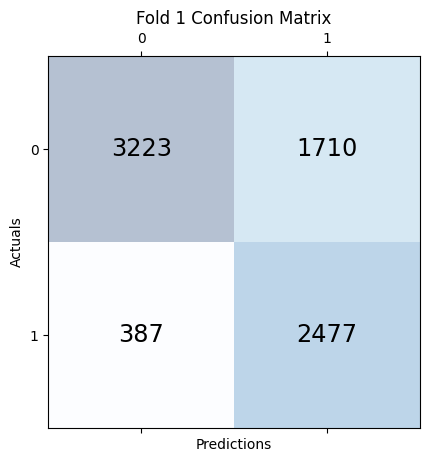

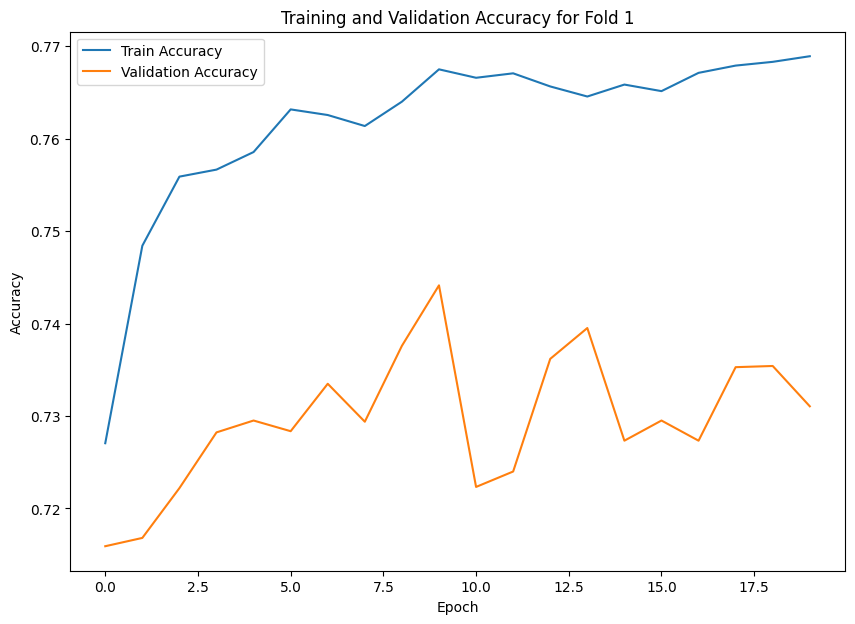

Epoch 10: early stopping
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


<Figure size 1000x700 with 0 Axes>

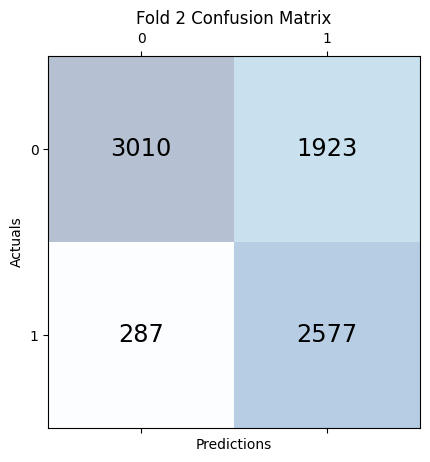

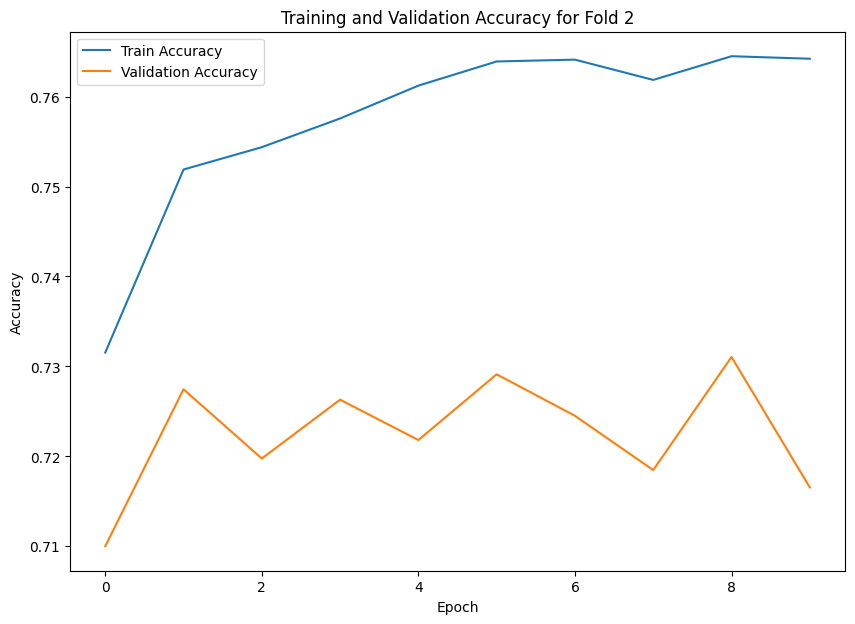

Epoch 10: early stopping
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


<Figure size 1000x700 with 0 Axes>

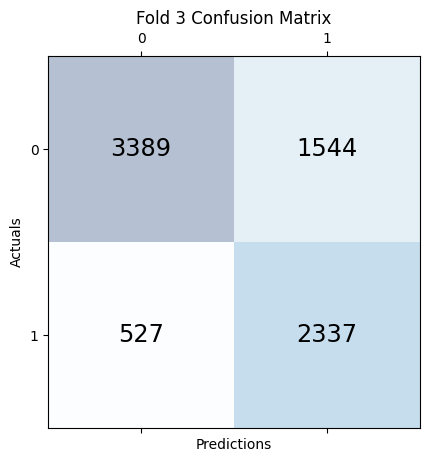

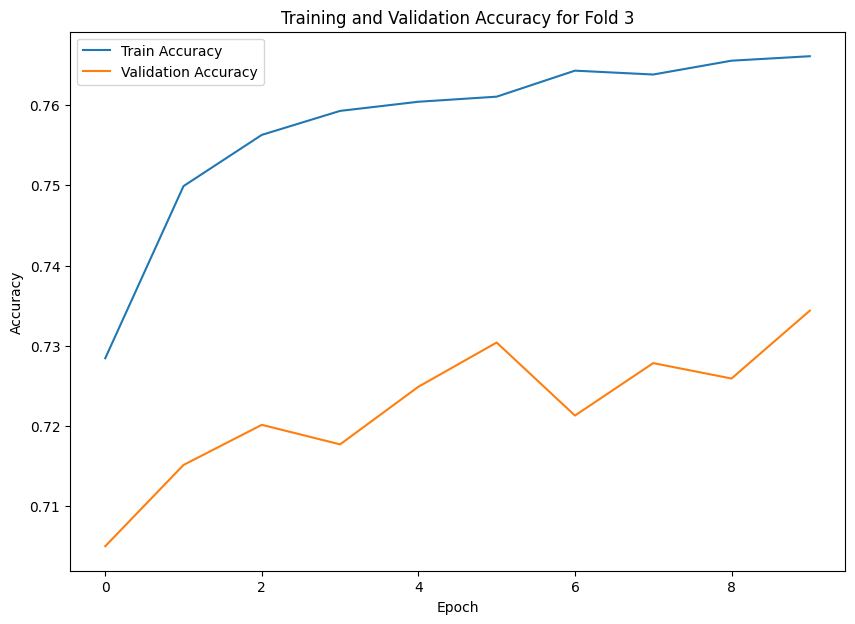

Epoch 10: early stopping
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


<Figure size 1000x700 with 0 Axes>

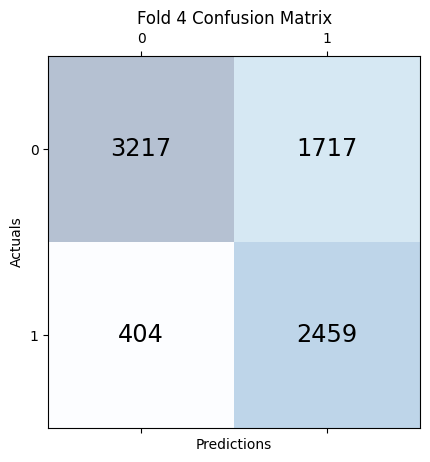

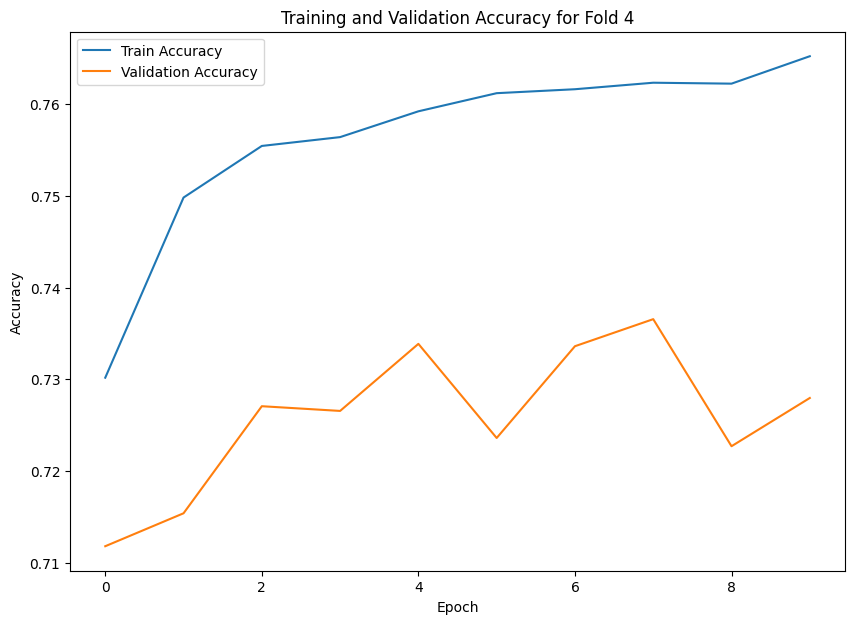

Epoch 10: early stopping
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


<Figure size 1000x700 with 0 Axes>

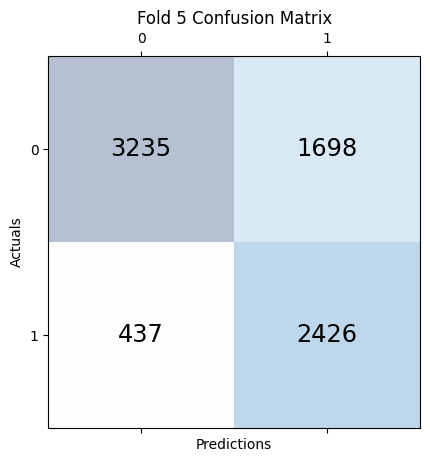

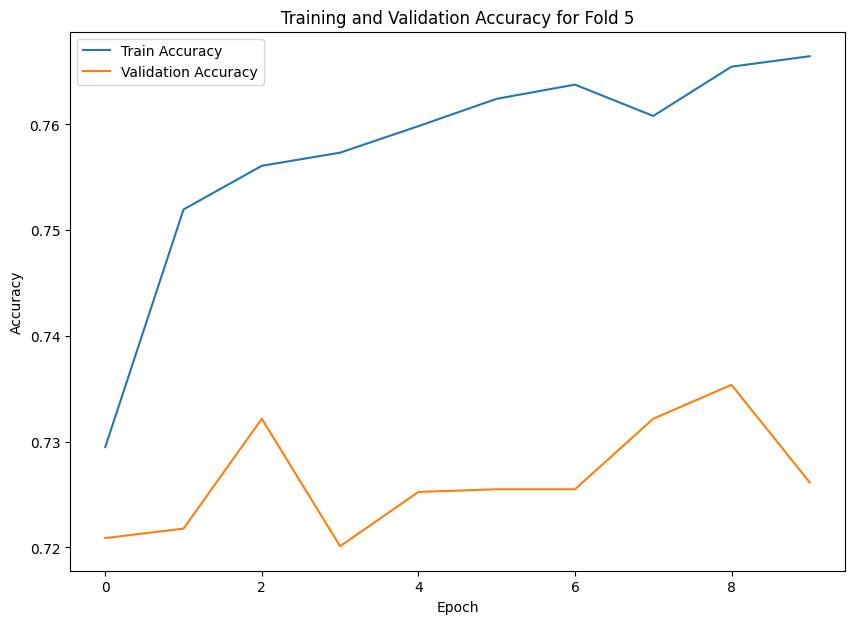

Average accuracy:  0.7272213935852051
Average balanced accuracy:  0.7545239844888268
Average precision:  0.588705780204335
Average recall:  0.8573817215211609
Average F1 score:  0.6977111587088052


In [54]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

def create_optimized_model(l2_rate=0.001, dropout_rate=0.2):
    model = Sequential([
        Input(shape=(X_scaled.shape[1],)),
        Dense(512, kernel_regularizer=l2(l2_rate)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(dropout_rate),

        Dense(256, kernel_regularizer=l2(l2_rate)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(dropout_rate),

        Dense(128, kernel_regularizer=l2(l2_rate)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(dropout_rate),

        Dense(64, kernel_regularizer=l2(l2_rate)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(dropout_rate),

        Dense(32, kernel_regularizer=l2(l2_rate)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(dropout_rate),

        Dense(1, activation='sigmoid')
    ])

    optimizer = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min'),
    ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=0)
]

# K-fold Cross Validation model evaluation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold_no = 1
accuracies = []
balanced_accuracies = []
all_f1_scores = []
all_precision = []
all_recall = []

for train, test in kfold.split(X_scaled, y):
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_scaled[train], y[train])

    model = create_optimized_model()
    history = model.fit(X_train_smote, y_train_smote, epochs=20, batch_size=64, 
                        callbacks=callbacks, verbose=0, validation_data=(X_scaled[test], y[test]))

    # Evaluate the model
    _, accuracy = model.evaluate(X_scaled[test], y[test], verbose=0)
    accuracies.append(accuracy)

    y_pred = model.predict(X_scaled[test]) 
    y_pred_labels = (y_pred > 0.5).astype(int)

    # Metrics
    f1 = f1_score(y[test], y_pred_labels)
    precision = precision_score(y[test], y_pred_labels)
    recall = recall_score(y[test], y_pred_labels)
    all_f1_scores.append(f1)
    all_precision.append(precision)
    all_recall.append(recall)

    balanced_accuracy = balanced_accuracy_score(y[test], y_pred_labels)
    balanced_accuracies.append(balanced_accuracy)

    # Confusion Matrix
    cm = confusion_matrix(y[test], y_pred_labels)
    plt.figure(figsize=(10, 7))
    plt.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(x=j, y=i, s=cm[i, j], va='center', ha='center', size='xx-large')
    plt.title(f'Fold {fold_no} Confusion Matrix')
    plt.xlabel('Predictions')
    plt.ylabel('Actuals')
    plt.show()

    # Plot training and validation accuracy
    plt.figure(figsize=(10, 7))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Training and Validation Accuracy for Fold {fold_no}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    fold_no += 1

# Final average scores
print("Average accuracy: ", np.mean(accuracies))
print("Average balanced accuracy: ", np.mean(balanced_accuracies))
print("Average precision: ", np.mean(all_precision))
print("Average recall: ", np.mean(all_recall))
print("Average F1 score: ", np.mean(all_f1_scores))
